# Data Visualization for Financial Analysis

In this work, crypto data will be imported using Binance API and visualized for financial analysis.

**See also** Binance Trader Bot with Python: https://github.com/DrFarukAydin/data-science-portfolio/blob/main/financial-tools/binance-bot.ipynb

**See also** Gate.io Trader Bot with Python: https://github.com/DrFarukAydin/data-science-portfolio/blob/main/financial-tools/gate-io-bot.ipynb

**See also** Technical Indicators for Financial Analysis with Python (Jupyter): https://github.com/DrFarukAydin/data-science-portfolio/blob/main/financial-tools/technical-indicators-finance.ipynb

<br><br>

**WARNING!!**

<li>The strategies used in this section are <b>not investment advices</b>. They are shown for only educational purposes.

<br><br>

## 1. Importing Libraries and Data

<br>**Importing Libraries**

In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import sqlalchemy
import time
import os
import asyncio
import warnings
warnings.filterwarnings('ignore')
from mplfinance.original_flavor import candlestick_ohlc
import mplfinance as mpf
import pandas_ta as pta
import matplotlib.dates as mdates


**Note** that some libraries should be installed with pip install.

<br>**Importing Data**

In [57]:
df = pd.read_csv("btc_df.csv")

In [58]:
df.head()


,Time,Open,High,Low,Close,Volume,Close_time,volume,Number_of_trades,Taker_buy_base_asset_vol,...,body_length,high_togreen,low_togreen,high_tored,low_tored,rsi,supertrend,upt,dt,st_signal
0,2022-07-14 09:15:00,19770.39,19818.35,19747.12,19748.62,1456.03190,1.657791e+12,2.880187e+07,38877.0,740.79937,...,-0.110114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,2022-07-14 09:30:00,19747.25,19798.15,19678.26,19794.56,2221.47521,1.657792e+12,4.384272e+07,53546.0,1029.51594,...,0.239578,NaN,NaN,NaN,NaN,NaN,19932.569,NaN,19932.569,0
2,2022-07-14 09:45:00,19794.55,19839.65,19760.33,19823.11,2719.07760,1.657793e+12,5.383640e+07,59292.0,1343.06868,...,0.144282,NaN,NaN,NaN,NaN,NaN,19932.569,NaN,19932.569,0
3,2022-07-14 10:00:00,19822.54,19847.27,19780.00,19807.73,2071.75418,1.657794e+12,4.105084e+07,46963.0,1025.27111,...,-0.074713,NaN,NaN,NaN,NaN,NaN,19932.569,NaN,19932.569,0
4,2022-07-14 10:15:00,19807.73,19830.00,19754.81,19797.52,1420.72239,1.657795e+12,2.811504e+07,38976.0,709.83030,...,-0.051546,NaN,NaN,NaN,NaN,95.657998,19932.569,NaN,19932.569,0


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time                       40 non-null     object 
 1   Open                       40 non-null     float64
 2   High                       40 non-null     float64
 3   Low                        40 non-null     float64
 4   Close                      40 non-null     float64
 5   Volume                     40 non-null     float64
 6   Close_time                 40 non-null     float64
 7   volume                     40 non-null     float64
 8   Number_of_trades           40 non-null     float64
 9   Taker_buy_base_asset_vol   40 non-null     float64
 10  Taker_buy_quote_asset_vol  40 non-null     float64
 11  Ignore                     40 non-null     float64
 12  signal                     40 non-null     object 
 13  greenline                  33 non-null     float64
 

In [60]:
df["Time"] = pd.to_datetime(df["Time"])

In [61]:
df = df.set_index("Time")

<br><br><br>

## 2. Visualization

### 2.1. Candlesticks with MOST Indicator

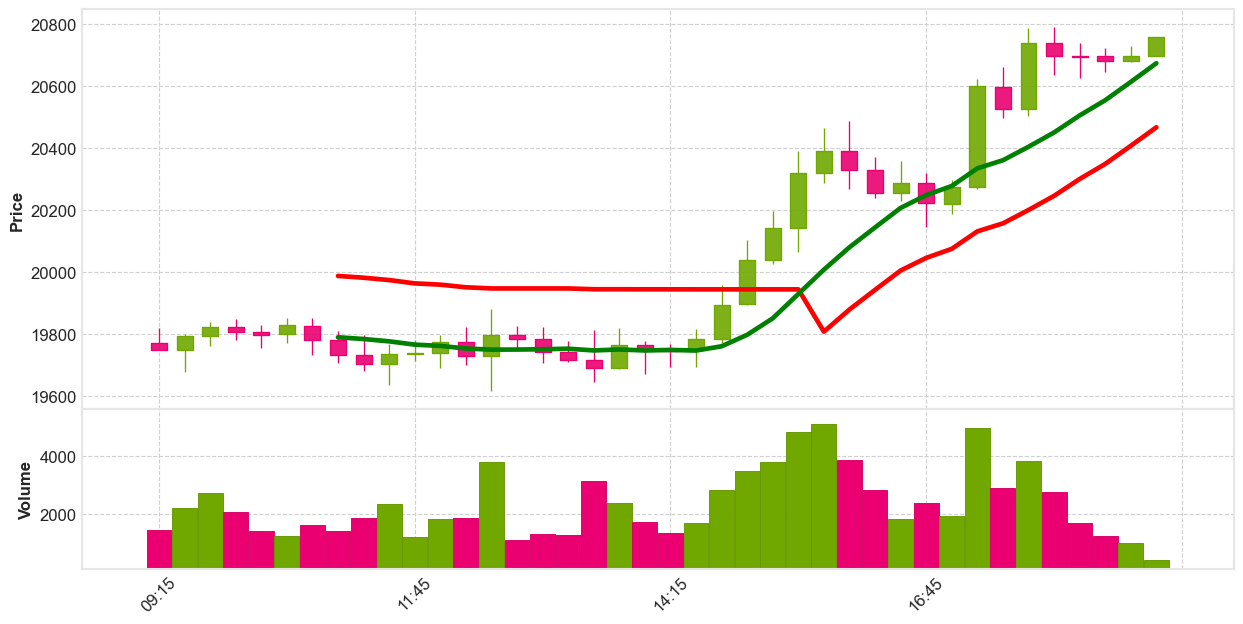

In [73]:
data = df
ohlc = df[["Open","High","Low","Close", "Volume"]]

ax = mpf.make_addplot(data["redline"],color = "red")
ax2 = mpf.make_addplot(data["greenline"], color = "green")
mpf.plot(ohlc, type="candle", style="binance", addplot = [ax,ax2], figsize =(16,8), volume=True)


<br><br><br>

### 2.2. Candlesticks with SuperTrend

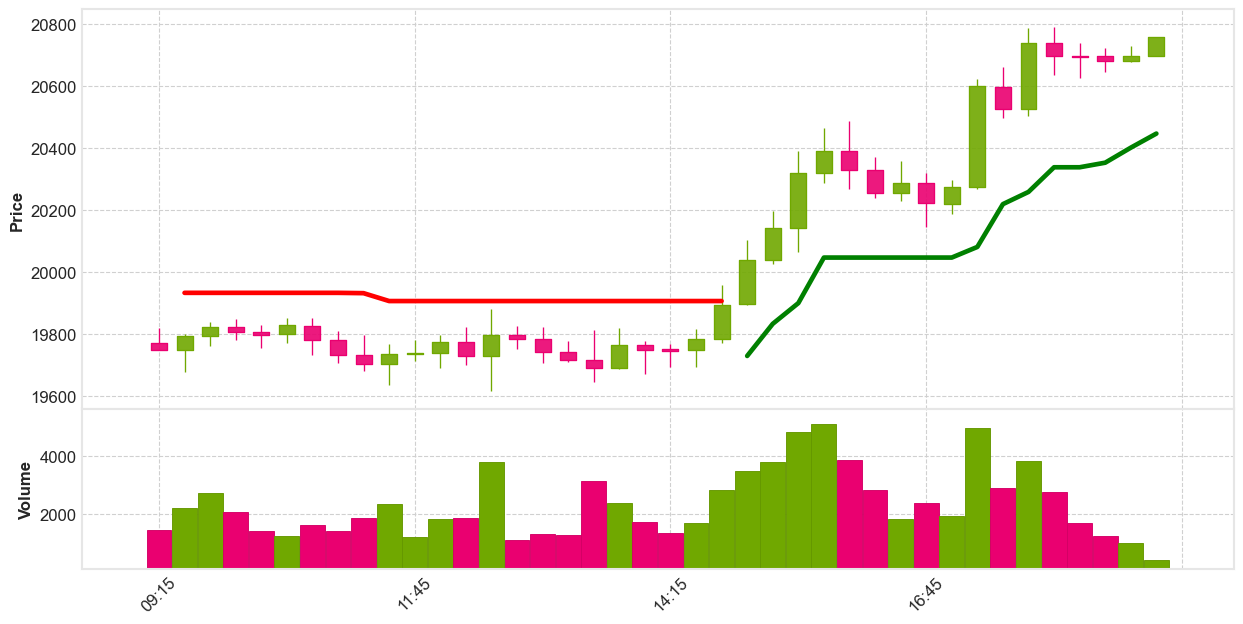

In [81]:
data = df
ohlc = df.iloc[-100:][["Open","High","Low","Close", "Volume"]]

ax2 = mpf.make_addplot(data["upt"], color = "green")
ax3 = mpf.make_addplot(data["dt"], color = "red")
mpf.plot(ohlc, type="candle", style="binance", addplot = [ax2,ax3], figsize =(16,8), volume=True);

<br><br><br>

### 2.3. Candlesticks with Moving Averages

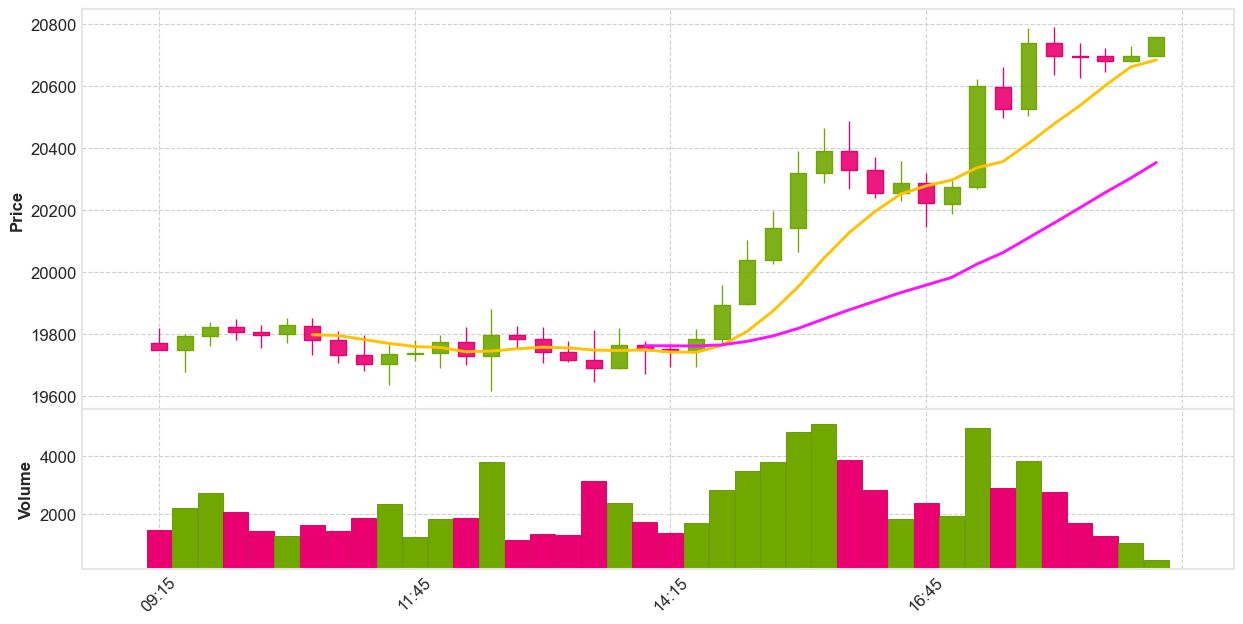

In [84]:
data = df
ohlc = df.iloc[-100:][["Open","High","Low","Close", "Volume"]]

mpf.plot(ohlc, type="candle", style="binance", mav=(7,20), figsize =(16,8), volume=True)

<br><br><br>

### 2.4. Price LinePlot

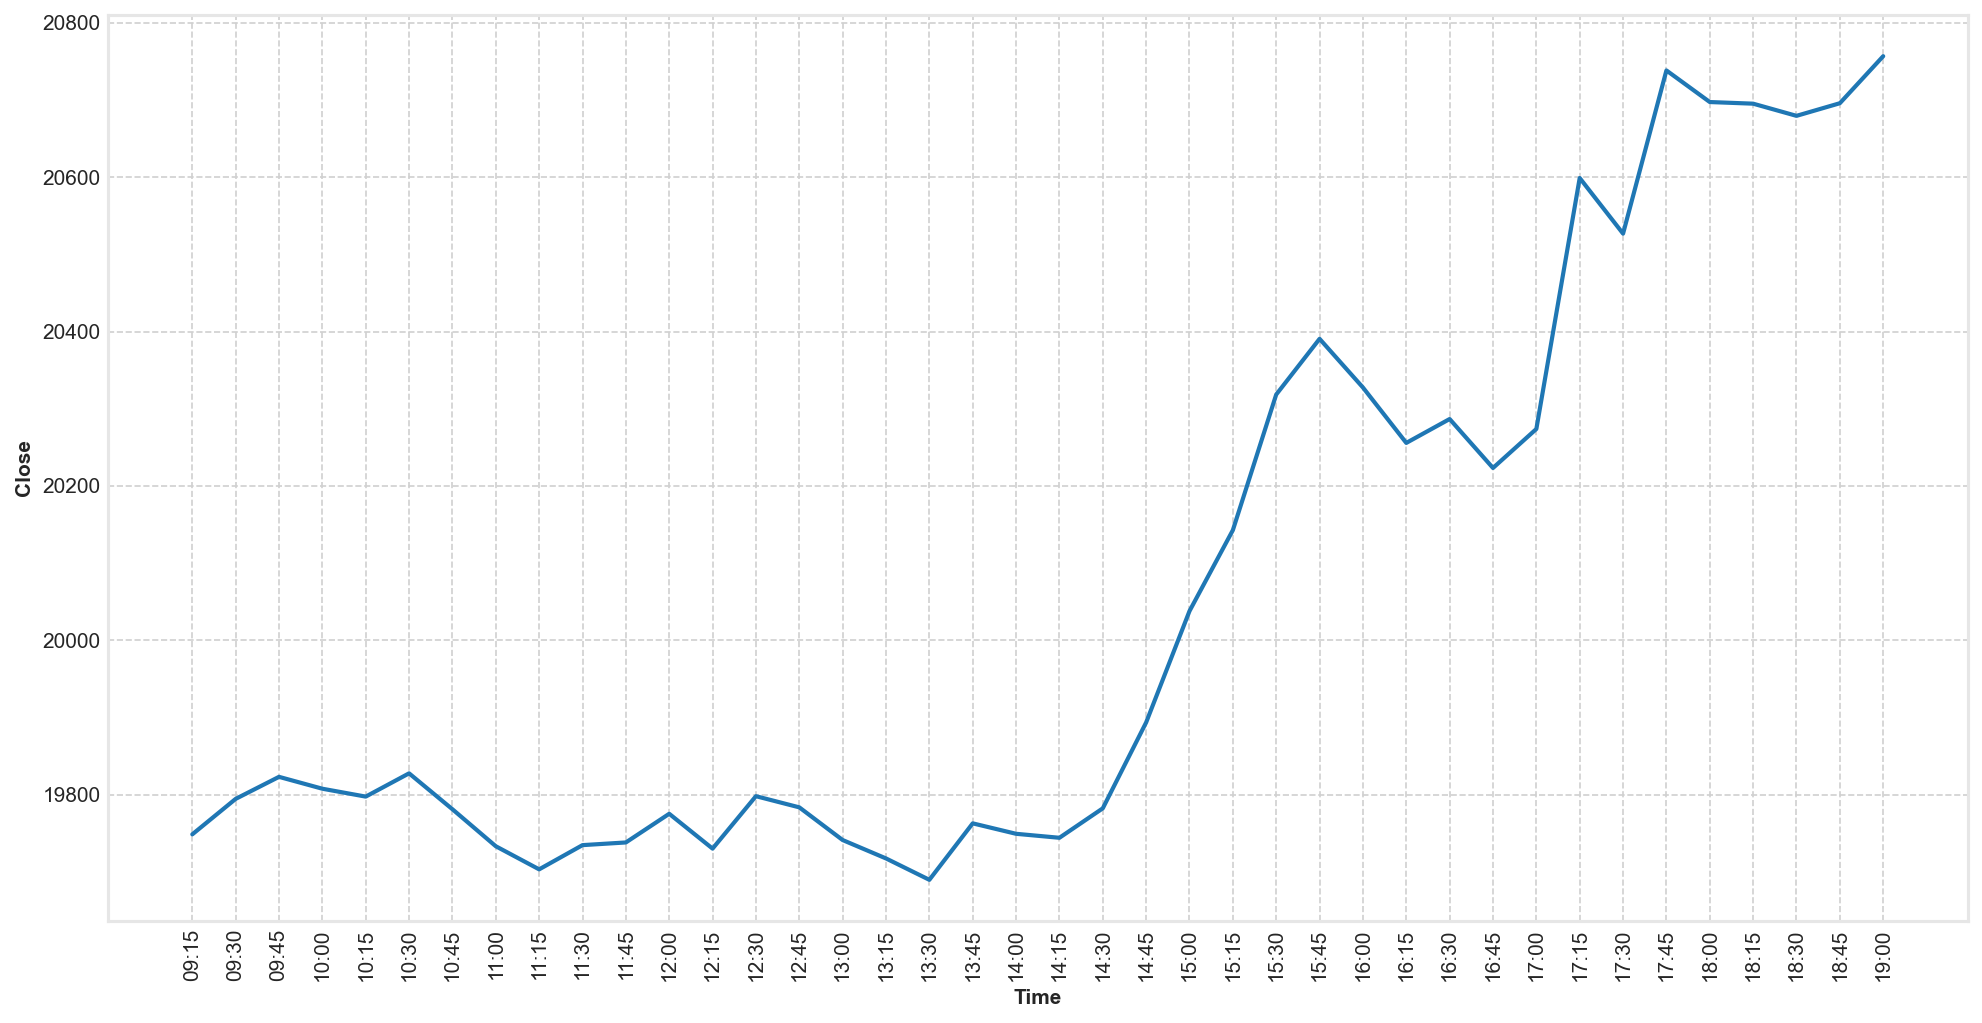

In [103]:
fig, ax = plt.subplots(figsize=(16,8), dpi=150)
ax = sns.lineplot(x=df.index, y=df["Close"])
h_fmt = mdates.DateFormatter('%H:%M')
locator = mdates.MinuteLocator(interval = 15)
plt.xticks(rotation=90)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(h_fmt)
ax.xaxis.set_ticks(df.index);

<br><br><br>

### 2.5. RSI

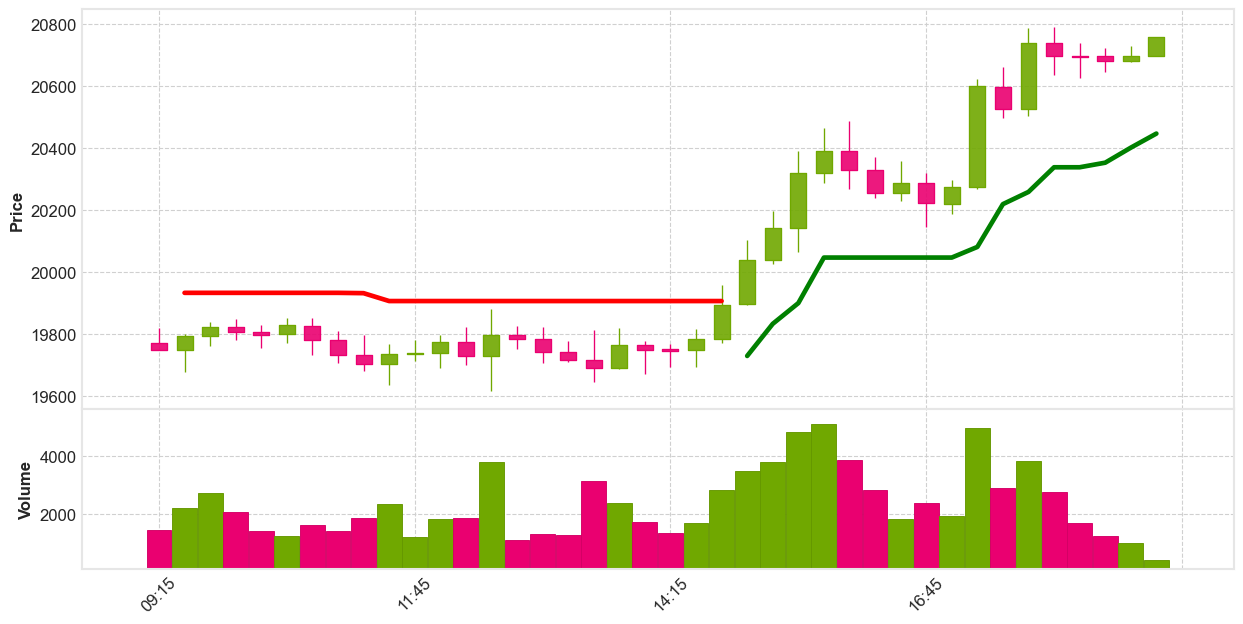

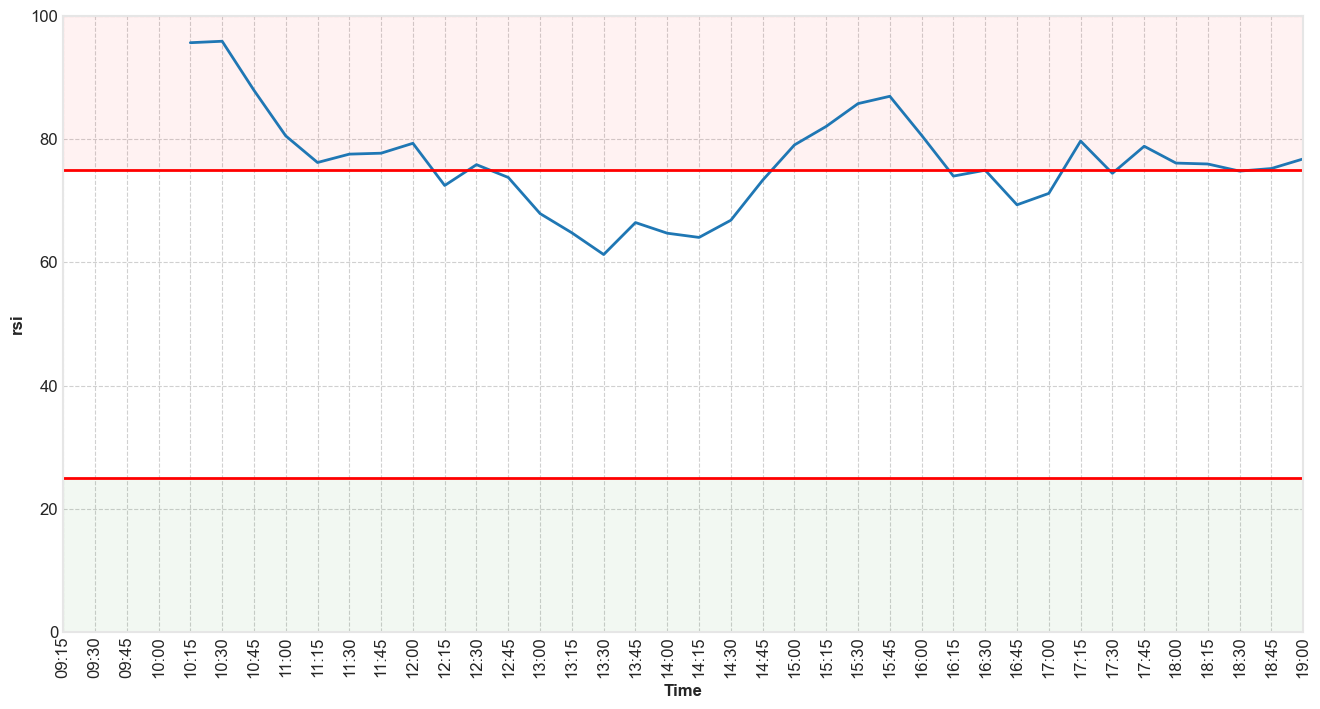

In [114]:
#Candlesticks
data = df
ohlc = df.iloc[-100:][["Open","High","Low","Close", "Volume"]]

ax2 = mpf.make_addplot(data["upt"], color = "green")
ax3 = mpf.make_addplot(data["dt"], color = "red")
mpf.plot(ohlc, type="candle", style="binance", addplot = [ax2,ax3], figsize =(16,8), volume=True);


#RSI
fig, ax = plt.subplots(figsize=(16,8))
ax = sns.lineplot(x=df.index, y=df["rsi"])
plt.hlines(y = 75, xmin=df.index[0], xmax=df.index[-1], color="red")
plt.hlines(y = 25, xmin=df.index[0], xmax=df.index[-1], color="red")
ax.axhspan(75, 100, alpha=0.05, color='red')
ax.axhspan(0, 25, alpha=0.05, color='green')
plt.ylim((0,100))
plt.xlim((df.index[0],df.index[-1]))

h_fmt = mdates.DateFormatter('%H:%M')
locator = mdates.MinuteLocator(interval = 15)
plt.xticks(rotation=90)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(h_fmt)
ax.xaxis.set_ticks(df.index);

<br><br>**Optional: Importing data with BinanceSocketManager**

There are two ways to import data from Binance. Either using Socket or getting historical data.<br>
<li> Using Socket Manager you can store your data to a local database.
<li> Getting historical data can provide historical and present data. If you do not want to store data in a local database then it is more feasible to choose this option.

In [21]:
bsm = BinanceSocketManager(client)
socket = bsm.trade_socket("MINAUSDT")
engine = sqlalchemy.create_engine("sqlite:///BTCUSDTstream.db")
await socket.__aenter__()
msg = await socket.recv()
msg

{'e': 'trade',
 'E': 1657721923714,
 's': 'MINAUSDT',
 't': 21862622,
 'p': '0.61600000',
 'q': '229.80000000',
 'b': 140915181,
 'a': 140915244,
 'T': 1657721923713,
 'm': True,
 'M': True}

In [ ]:
pd.read_sql("MINAUSDT", engine)

<br><li> As seen, the data is provided in json format. We can create a pandas dataframe with a function

In [29]:
def create_df(msg):
    # creating pandas dataframe
    df = pd.DataFrame([msg])
    
    # filtering the features we want
    df = df.loc[:,["s","E","p"]]
    
    # renaming column names
    df.columns = ["Symbol", "Time","Price"]
    
    # replacing data types
    df.Price = df["Price"].astype(float)
    df.Time = pd.to_datetime(df.Time,unit = "ms")
    
    return df

In [26]:
create_df(msg)

,Symbol,Time,Price
0,MINAUSDT,2022-07-13 14:18:43.714,0.616


In [30]:
create_df(msg).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Symbol  1 non-null      object        
 1   Time    1 non-null      datetime64[ns]
 2   Price   1 non-null      float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 152.0+ bytes


<br><br>**Importing Historical Data (inc. the most recent)**

We can import historical data with a single code.

In [28]:
client.get_historical_klines("ETHUSDT", "15m", "60 min ago UTC+")

[[1657719900000,
  '1037.00000000',
  '1046.16000000',
  '1034.29000000',
  '1041.73000000',
  '63858.18320000',
  1657720799999,
  '66451551.53421900',
  42034,
  '30673.69080000',
  '31921165.39044400',
  '0'],
 [1657720800000,
  '1041.73000000',
  '1048.97000000',
  '1037.74000000',
  '1041.96000000',
  '40773.17680000',
  1657721699999,
  '42472233.31233400',
  29525,
  '21064.39330000',
  '21938229.65791000',
  '0'],
 [1657721700000,
  '1041.96000000',
  '1043.00000000',
  '1032.80000000',
  '1036.92000000',
  '28000.53860000',
  1657722599999,
  '29036452.48743600',
  22632,
  '13430.70630000',
  '13927484.21765300',
  '0'],
 [1657722600000,
  '1036.91000000',
  '1041.25000000',
  '1036.01000000',
  '1041.06000000',
  '4787.25610000',
  1657723499999,
  '4968746.59110200',
  3015,
  '2422.22210000',
  '2513994.31848400',
  '0']]

<br><br> This function requires the pair name we want (ex: "ETHUSDT"), the time interval (ex: "15m") and how further we want to go back in time (ex:"60 minutes"). 

As you can see, this function returns a list. To understand their meanings you can check the documentation, but we can create a dataframe for better understanding. To do that we can define a function.

In [31]:
 def klines_table(currency,interval,timeago):
    # creating pandas dataframe
    frame = pd.DataFrame(client.get_historical_klines(str(currency), str(interval), str(timeago)+" min ago UTC+"))    
    
    # changing column names
    frame.columns = ["Time","Open", "High", "Low", "Close","Volume", "Close_time", "volume", "Number_of_trades", "Taker_buy_base_asset_vol", "Taker_buy_quote_asset_vol", "Ignore"]
    
    # setting time as index and setting as time
    frame = frame.set_index("Time")
    frame.index = pd.to_datetime(frame.index, unit ="ms")
    
    # changing all values to float
    frame = frame.astype(float)
    return frame

In [32]:
klines_table("MINAUSDT", "15m",60)

,Open,High,Low,Close,Volume,Close_time,volume,Number_of_trades,Taker_buy_base_asset_vol,Taker_buy_quote_asset_vol,Ignore
Time,,,,,,,,,,,
2022-07-13 13:45:00,0.610,0.619,0.608,0.618,159188.5,1.657721e+12,97781.7611,566.0,89559.7,55044.8583,0.0
2022-07-13 14:00:00,0.617,0.621,0.615,0.618,70783.7,1.657722e+12,43747.6022,305.0,36730.6,22717.4072,0.0
2022-07-13 14:15:00,0.618,0.619,0.615,0.618,35093.4,1.657723e+12,21655.1132,172.0,18595.8,11480.4054,0.0
2022-07-13 14:30:00,0.618,0.625,0.616,0.624,45722.3,1.657723e+12,28428.4059,212.0,31952.4,19865.6398,0.0


In [33]:
klines_table("MINAUSDT", "15m",60).info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4 entries, 2022-07-13 13:45:00 to 2022-07-13 14:30:00
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Open                       4 non-null      float64
 1   High                       4 non-null      float64
 2   Low                        4 non-null      float64
 3   Close                      4 non-null      float64
 4   Volume                     4 non-null      float64
 5   Close_time                 4 non-null      float64
 6   volume                     4 non-null      float64
 7   Number_of_trades           4 non-null      float64
 8   Taker_buy_base_asset_vol   4 non-null      float64
 9   Taker_buy_quote_asset_vol  4 non-null      float64
 10  Ignore                     4 non-null      float64
dtypes: float64(11)
memory usage: 384.0 bytes


<br> Now the table is more understandable. We could also set "Close_time" as time, but we will focus on price parameters.

**Note that** at the last row "Close" represents the current price, so each time we rerun this function, the "Close" price will be updated because the current time interval has not been closed yet.

<br><br>

**Checking Assets in the Wallet**

We can check our assets with a single function. Note that it may give a huge amount of data, because it shows also the pairs we have not invested.

In [36]:
client.get_account()["balances"][0:3]

[{'asset': 'BTC', 'free': '0.00000768', 'locked': '0.00000000'},
 {'asset': 'LTC', 'free': '0.00000000', 'locked': '0.00000000'},
 {'asset': 'ETH', 'free': '0.00006328', 'locked': '0.00000000'}]

<br> We can define a function to make it clear.

In [37]:
def myasset():
    # importing the assets
    df = pd.DataFrame(client.get_account()["balances"])
    
    # setting index as asset pair
    df = df.set_index("asset")
    
    # setting data types as float
    df = df.astype(float)
    
    # adding a column to see our total asset
    df["total"] = df["free"] + df["locked"]
    
    # sorting the assets by our remaining amount
    df = df.sort_values("total",ascending = False)
    
    # filtering the assets that we do not possess
    df = df[df["total"] >0]
    
    # returning only four digits of the values
    return df.round(4)

In [39]:
myasset().tail(5)

,free,locked,total
asset,,,
ETH,0.0001,0.0,0.0001
LUNA,0.0001,0.0,0.0001
SUPER,0.0000,0.0,0.0000
BTC,0.0000,0.0,0.0000
DASH,0.0000,0.0,0.0000


In [75]:
def maketable(df):
    df["signal"] = "red"
    df ["greenline"] = df["Close"].rolling(window=8).mean()
    df["redline"] = df["greenline"]
    ort_localmax = df.iloc[7]["greenline"]
    ort_localmin = df.iloc[7]["greenline"]
    signal = "*"
    redline= df.iloc[7]["greenline"]
    for i in range(7,len(df)):
        if ort_localmax < df.iloc[i]["greenline"]:
            ort_localmax = df.iloc[i]["greenline"]
        if ort_localmin > df.iloc[i]["greenline"]:
            ort_localmin = df.iloc[i]["greenline"]

        if df.iloc[i]["greenline"] <= ort_localmax*0.985:
            signal = "red"
            redline = ort_localmin*1.015
            if df.iloc[i]["greenline"] > redline:
                signal = "green"

        elif df.iloc[i]["greenline"] > ort_localmin*1.015:
            signal = "green"
            redline = ort_localmax*0.985
            if df.iloc[i]["greenline"] < redline:
                signal = "red"


        else:
            signal = df.loc[df.index[i-1],"signal"]

        if signal == "red":
            ort_localmax = df.iloc[i]["greenline"]
            redline = ort_localmin*1.015
        if signal == "green":
            ort_localmin = df.iloc[i]["greenline"]
            redline = ort_localmax*0.985



        df.loc[df.index[i],"signal"] = signal
        df.loc[df.index[i], "slope_greenline"] = (df.iloc[i]["greenline"]-df.iloc[i-1]["greenline"])/df.iloc[i-1]["greenline"]*100
        df.loc[df.index[i],"redline"] = redline



    #needle length
    df["needle_length"] = (df["High"]-df["Low"])/df["Low"]*100
    #body length
    df["body_length"] = (df["Close"]-df["Open"])/df["Open"]*100
    #distance of high to the greenline
    df["high_togreen"] = (df["High"] - df["greenline"])/df["greenline"]*100
    #distance of low to the greenline
    df["low_togreen"] = (df["Low"] - df["greenline"])/df["greenline"]*100
    #distance of high to the redline
    df["high_tored"] = (df["High"] - df["redline"])/df["redline"]*100
    #distance of low to the redline
    df["low_tored"] = (df["Low"] - df["redline"])/df["redline"]*100

    #rsi
    df["rsi"] = pta.rsi(df['Close'], length = 14)
    df["signal_dummy"]=pd.get_dummies(df["signal"])["green"]
    return df

In [730]:
data = df.iloc[15:,:]

In [542]:
data.iloc[:,8:]

,Taker_buy_base_asset_vol,Taker_buy_quote_asset_vol,Ignore,signal,greenline,redline,slope_greenline,needle_length,body_length,high_togreen,low_togreen,high_tored,low_tored,rsi
Time,,,,,,,,,,,,,,
2021-08-10 09:45:00,77521.8,237029.7904,0.0,red,3.070625,3.116684,-0.955568,3.131246,-2.910737,0.826379,-2.234887,-0.663666,-3.679692,39.880715
2021-08-10 10:00:00,89536.5,271021.6061,0.0,red,3.049750,3.095496,-0.679829,3.547297,-0.998004,0.500041,-2.942864,-0.985181,-4.377206,38.506925
2021-08-10 10:15:00,152748.1,447575.1993,0.0,red,3.025000,3.070375,-0.811542,3.363384,-1.849361,-1.454545,-4.661157,-2.910882,-6.070105,35.610750
2021-08-10 10:30:00,111622.8,322858.0041,0.0,red,2.992500,3.037388,-1.074380,3.226938,-1.747772,-1.654135,-4.728488,-3.107523,-6.136441,33.160449
2021-08-10 10:45:00,82400.7,238080.4908,0.0,red,2.961625,3.006049,-1.031746,1.678909,-0.174398,-1.844427,-3.465158,-3.295002,-4.891782,32.925850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-24 15:45:00,31114.7,133838.6917,0.0,green,4.379875,4.315162,-0.022826,1.097362,0.557750,-1.138731,-2.211821,0.343860,-0.745323,48.846288
2021-09-24 16:00:00,38127.5,165218.9387,0.0,green,4.368250,4.315162,-0.265419,1.301720,-0.323550,-0.234648,-1.516626,0.992735,-0.305015,47.882322
2021-09-24 16:15:00,39741.0,172234.1431,0.0,green,4.349125,4.315162,-0.437818,1.255814,0.487239,0.112092,-1.129538,0.900039,-0.351363,49.268557


<AxesSubplot:>

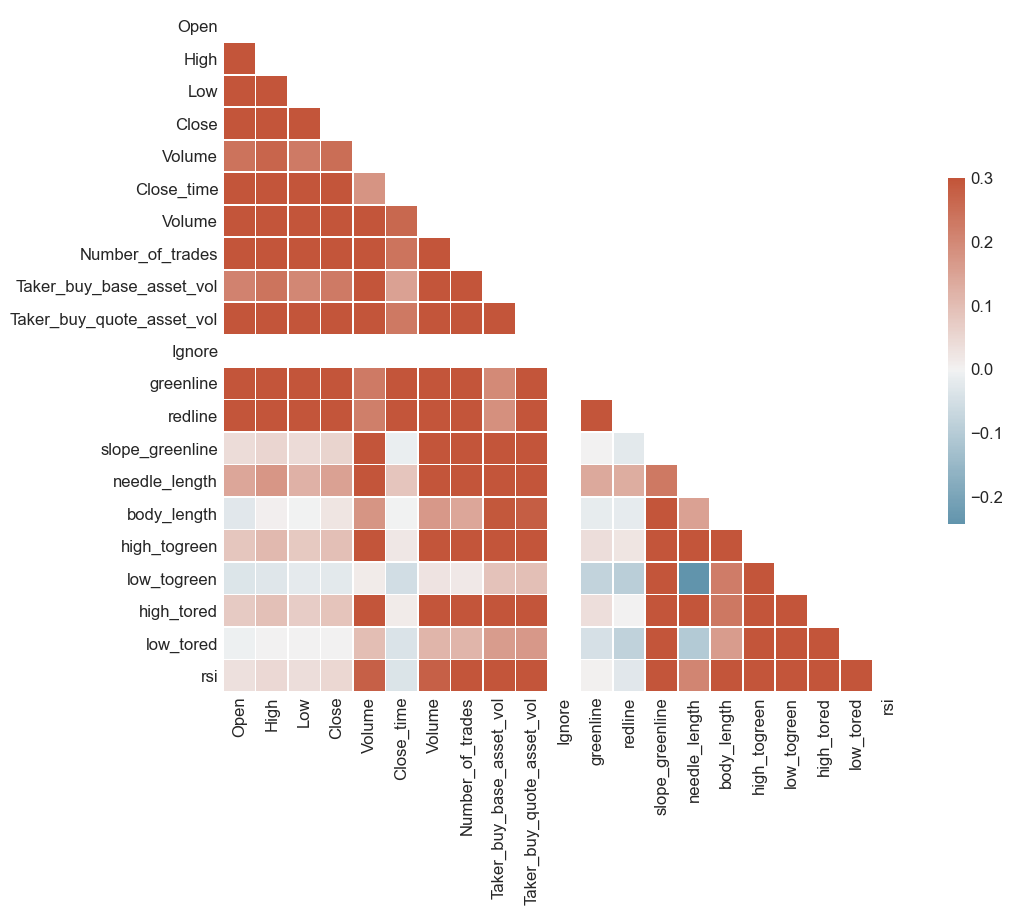

In [543]:
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
#volume vs needle length

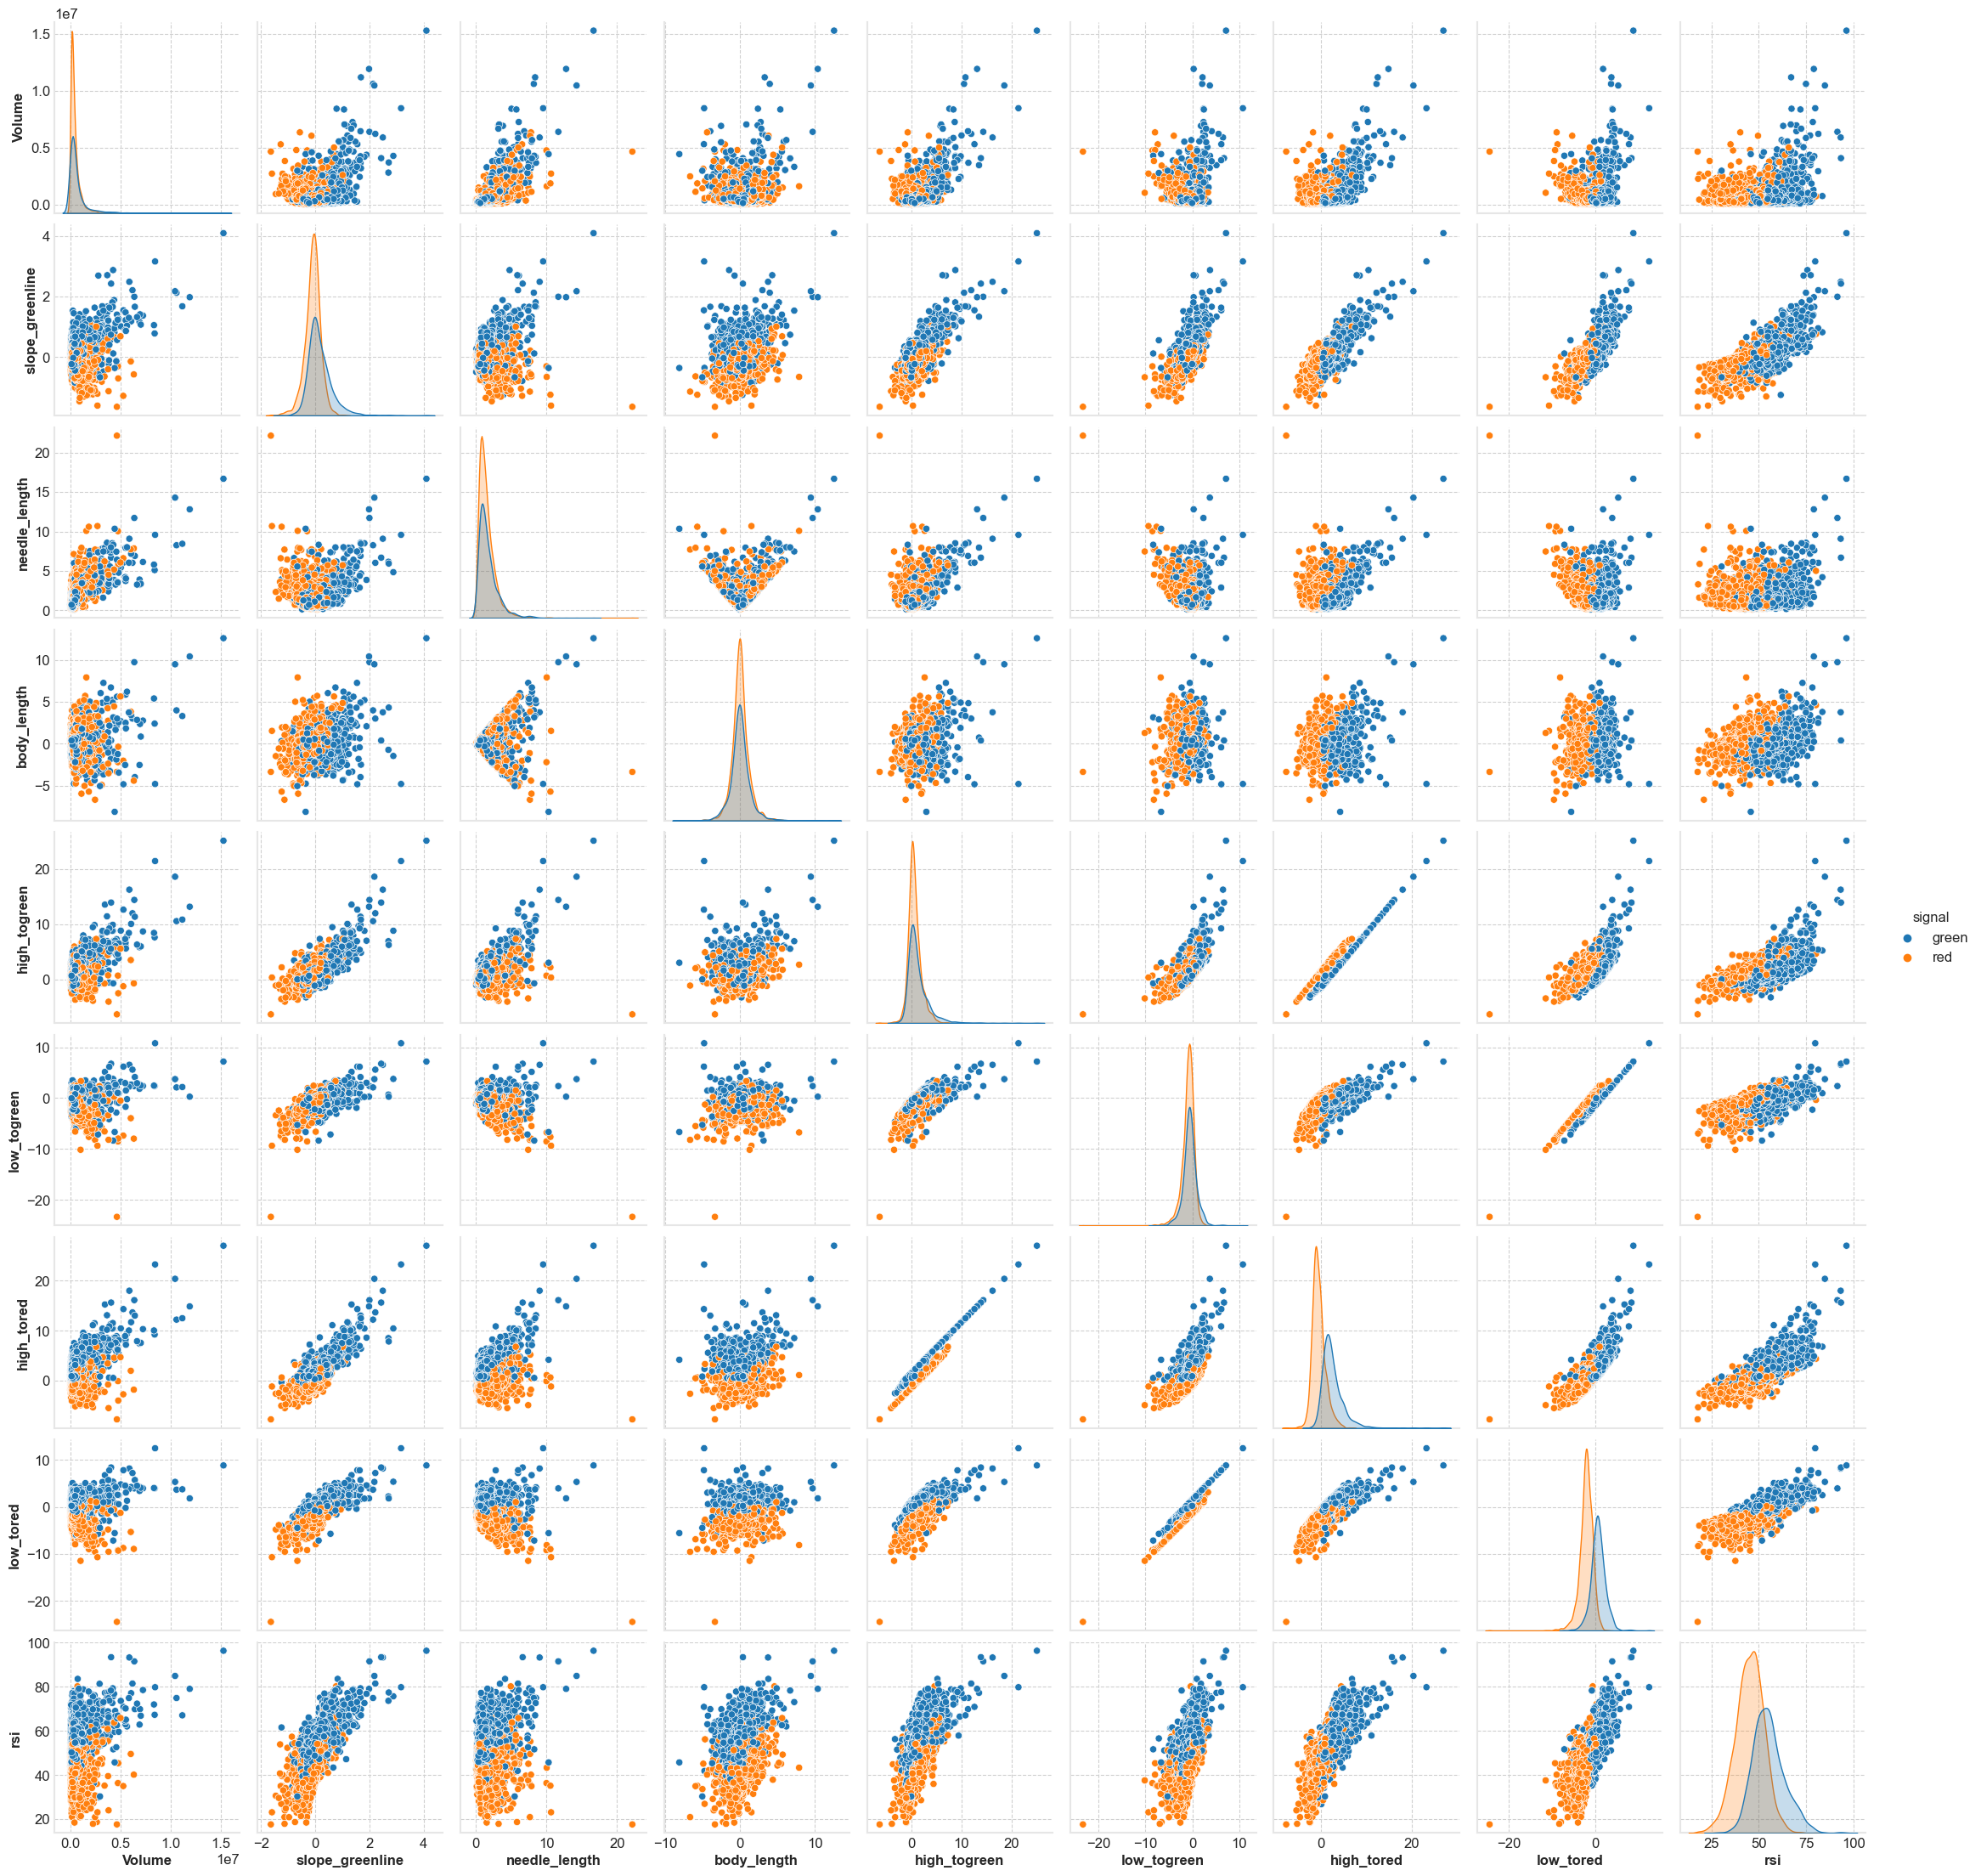

In [588]:
sns.pairplot(data2, hue = "signal", hue_order={"green":"green","red":"red"})



In [590]:
data.corr()

,Open,High,Low,Close,Volume,Close_time,Volume,Number_of_trades,Taker_buy_base_asset_vol,Taker_buy_quote_asset_vol,...,greenline,redline,slope_greenline,needle_length,body_length,high_togreen,low_togreen,high_tored,low_tored,rsi
Open,1.000000,0.998989,0.999240,0.998599,0.240955,0.823772,0.366495,0.343067,0.211515,0.324365,...,0.998320,0.996124,0.040295,0.144835,-0.027353,0.082432,-0.034198,0.075696,-0.005226,0.033797
High,0.998989,1.000000,0.998623,0.999358,0.266409,0.822119,0.391381,0.368342,0.240279,0.352660,...,0.997487,0.995112,0.055828,0.174195,0.005567,0.108131,-0.030494,0.095934,-0.000783,0.049419
Low,0.999240,0.998623,1.000000,0.999185,0.226971,0.824722,0.353486,0.328330,0.201860,0.315477,...,0.998186,0.996161,0.042794,0.123790,-0.002751,0.079268,-0.019493,0.071898,0.003081,0.037788
Close,0.998599,0.999358,0.999185,1.000000,0.249796,0.823642,0.375569,0.350621,0.226670,0.339690,...,0.997573,0.995331,0.057207,0.152224,0.024192,0.097861,-0.022905,0.087322,0.003027,0.051693
Volume,0.240955,0.266409,0.226971,0.249796,1.000000,0.177240,0.970121,0.958033,0.979105,0.952761,...,0.225975,0.217679,0.378102,0.770815,0.174996,0.600931,0.012529,0.515780,0.100253,0.276282
Close_time,0.823772,0.822119,0.824722,0.823642,0.177240,1.000000,0.263382,0.238571,0.152138,0.229341,...,0.825463,0.824980,-0.009925,0.084550,-0.002839,0.019306,-0.053245,0.011919,-0.038612,-0.036817
Volume,0.366495,0.391381,0.353486,0.375569,0.970121,0.263382,1.000000,0.969898,0.949524,0.980417,...,0.351040,0.341951,0.372317,0.724929,0.170735,0.579441,0.027875,0.503179,0.113999,0.276848
Number_of_trades,0.343067,0.368342,0.328330,0.350621,0.958033,0.238571,0.969898,1.000000,0.935325,0.948917,...,0.326701,0.316817,0.386847,0.771314,0.145279,0.605327,0.016723,0.531044,0.116698,0.297746
Taker_buy_base_asset_vol,0.211515,0.240279,0.201860,0.226670,0.979105,0.152138,0.949524,0.935325,1.000000,0.971633,...,0.196230,0.187121,0.434855,0.746415,0.292648,0.649055,0.089345,0.558828,0.162013,0.337602
Taker_buy_quote_asset_vol,0.324365,0.352660,0.315477,0.339690,0.952761,0.229341,0.980417,0.948917,0.971633,1.000000,...,0.308651,0.298786,0.425607,0.705397,0.281986,0.625407,0.098126,0.544149,0.170691,0.332787


<AxesSubplot:xlabel='high_togreen', ylabel='signal'>

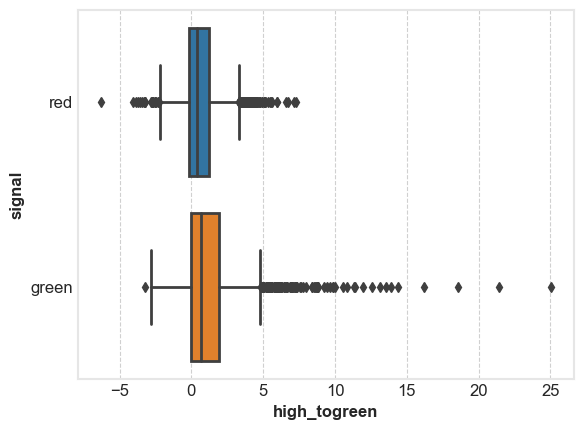

In [594]:
sns.boxplot(data = data, x = data["high_togreen"],y = data["signal"])

<AxesSubplot:xlabel='low_togreen', ylabel='signal'>

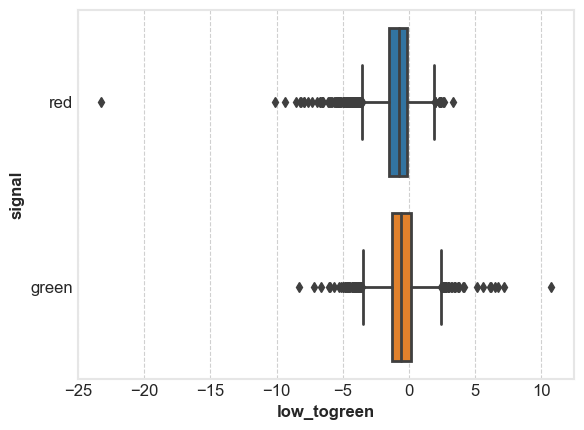

In [595]:
sns.boxplot(data = data, x = data["low_togreen"],y = data["signal"])

<AxesSubplot:xlabel='needle_length', ylabel='signal'>

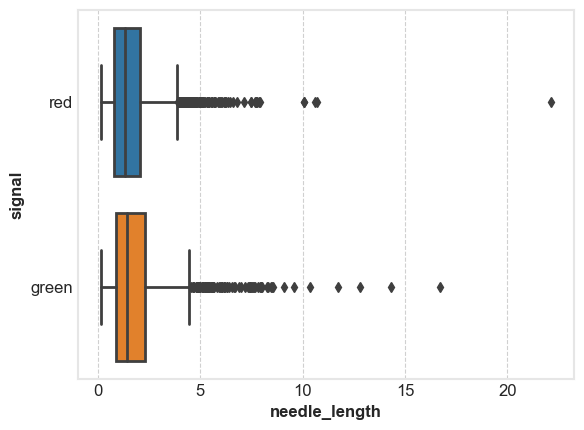

In [647]:
sns.boxplot(data = data, x = data["needle_length"],y = data["signal"])

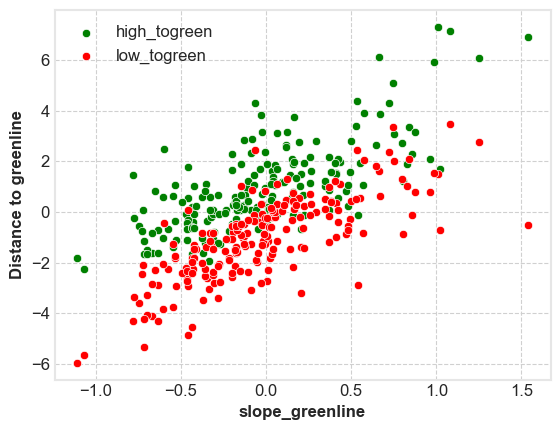

In [674]:
fig, ax = plt.subplots()
sns.scatterplot(data = data, x = "slope_greenline", y = "high_togreen", color = "green")
sns.scatterplot(data = data, x = "slope_greenline", y = "low_togreen", color = "red")
ax.legend({"high_togreen":"high","low_togreen":"low"},loc="best")
ax.set_ylabel("Distance to greenline")
fig.show()

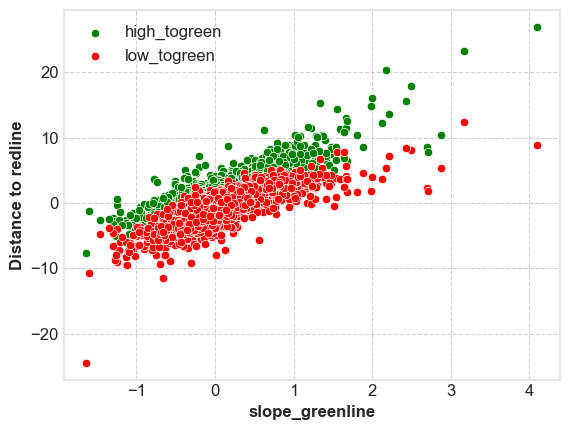

In [863]:
fig, ax = plt.subplots()
sns.scatterplot(data = data, x = "slope_greenline", y = "high_tored", color = "green")
sns.scatterplot(data = data, x = "slope_greenline", y = "low_tored", color = "red")
ax.legend({"high_togreen":"high","low_togreen":"low"},loc="best")
ax.set_ylabel("Distance to redline")
fig.show()

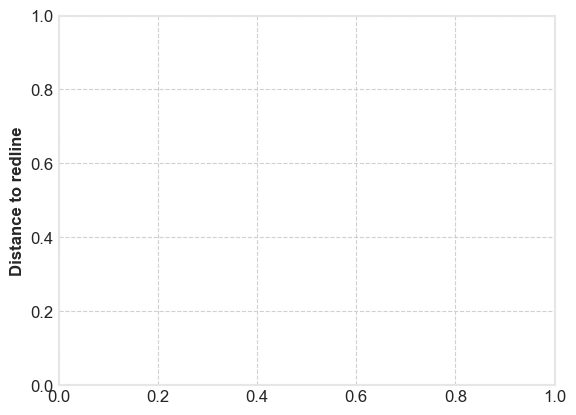

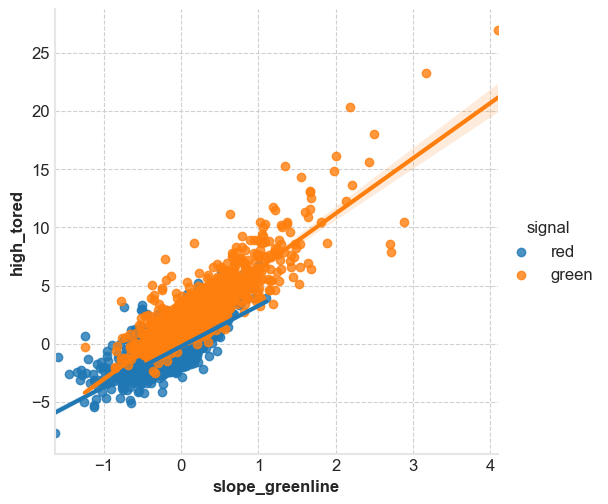

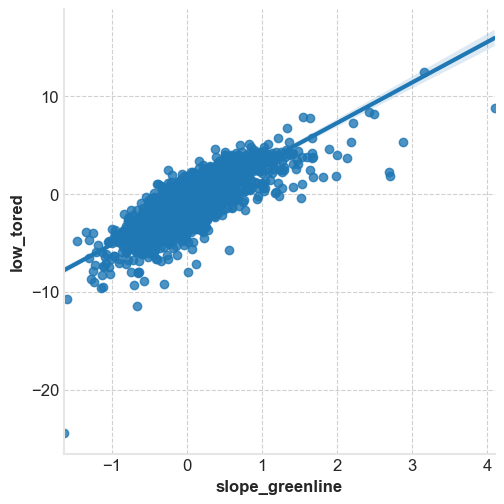

In [866]:
fig, ax = plt.subplots()
sns.lmplot(data = data, x = "slope_greenline", y = "high_tored",hue="signal")
sns.lmplot(data = data, x = "slope_greenline", y = "low_tored")
ax.legend({"high_togreen":"high","low_togreen":"low"},loc="best")
ax.set_ylabel("Distance to redline")
fig.show()

In [915]:
data["low_togreen"][data["signal"] == "red"].quantile(0.25)

-1.51135228759545

In [916]:
data["high_togreen"][data["signal"] == "red"].quantile(0.75)

1.2314966046453666

In [917]:
data["low_togreen"][data["signal"] == "green"].quantile(0.25)

-1.3007694144056194

In [918]:
data["high_togreen"][data["signal"] == "green"].quantile(0.75)

1.9145483497338298

In [21]:
df = data

In [18]:
data

,Open,High,Low,Close,Volume,Close_time,volume,Number_of_trades,Taker_buy_base_asset_vol,Taker_buy_quote_asset_vol,...,redline,slope_greenline,needle_length,body_length,high_togreen,low_togreen,high_tored,low_tored,rsi,signal_dummy
Time,,,,,,,,,,,,,,,,,,,,,
2021-10-01 12:30:00,4.427,4.434,4.313,4.316,334269.7,1.633092e+12,1.464734e+06,2208.0,86038.0,3.775017e+05,...,4.320607,-0.022913,2.805472,-2.507341,1.621498,-1.151664,2.624457,-0.176075,54.700657,1
2021-10-01 12:45:00,4.315,4.380,4.311,4.357,146158.7,1.633093e+12,6.360256e+05,1291.0,75710.3,3.293942e+05,...,4.328527,0.206268,1.600557,0.973349,0.177254,-1.400881,1.189146,-0.404930,58.817332,1
2021-10-01 13:00:00,4.361,4.436,4.360,4.400,141961.6,1.633094e+12,6.254232e+05,1206.0,71937.8,3.169307e+05,...,4.340160,0.268740,1.743119,0.894290,1.186131,-0.547445,2.208214,0.457126,62.650908,1
2021-10-01 13:15:00,4.404,4.430,4.391,4.416,94862.1,1.633095e+12,4.179627e+05,842.0,66750.9,2.942830e+05,...,4.350802,0.245210,0.888180,0.272480,0.802093,-0.085329,1.820296,0.923910,63.993985,1
2021-10-01 13:30:00,4.417,4.430,4.393,4.394,143077.2,1.633096e+12,6.306010e+05,810.0,32473.5,1.433091e+05,...,4.350802,-0.082485,0.842249,-0.520715,0.885308,0.042700,1.820296,0.969879,60.758671,1
2021-10-01 13:45:00,4.393,4.395,4.330,4.330,133227.0,1.633097e+12,5.810753e+05,1071.0,38795.3,1.693260e+05,...,4.350802,-0.250505,1.501155,-1.434100,0.339602,-1.144374,1.015847,-0.478130,52.451103,1
2021-10-01 14:00:00,4.330,4.372,4.290,4.356,196728.6,1.633098e+12,8.511866e+05,1428.0,74135.5,3.214880e+05,...,4.350802,-0.134129,1.911422,0.600462,-0.051437,-1.926044,0.487209,-1.397501,55.134915,1
2021-10-01 14:15:00,4.356,4.358,4.322,4.326,100024.1,1.633099e+12,4.332510e+05,663.0,29919.2,1.296678e+05,...,4.350802,-0.282906,0.832948,-0.688705,-0.088838,-0.914171,0.165429,-0.662004,51.521384,1
2021-10-01 14:30:00,4.323,4.346,4.322,4.330,75289.3,1.633099e+12,3.262960e+05,619.0,35302.4,1.530149e+05,...,4.350802,0.040120,0.555298,0.161925,-0.403907,-0.953909,-0.110382,-0.662004,51.973355,1


In [149]:
data = klines_table("MINAUSDT", "15m", 15*4*72)
data = maketable (data)
data = data.iloc[20:,:]
buy = True
sell = False
profits = []
results = []
greenlow = [0.3,0.1,0,-1,-1]
greenhigh = [1,1.5,2.5]
redlow = [-1.5,-1.8,-1.6]
redhigh = [1.5,0,0.3,0.5,0.8]

greenlow = [-1,0,0.1,0.3]
greenhigh = [1,0.5,1.5]
redlow = [-1.5,-2,-1]
redhigh = [0,0.3,-0.1,-0.3]

greenlow = [-2,-1.8,0]
greenhigh = [1,1.5,2]
redlow = [-3,-2,-2.5]
redhigh = [0.5,1]

results = pd.DataFrame({"greenlow":[],"greenhigh":[],"redlow":[],"redhigh":[],"sum":[]})
for j in greenlow:
    for k in greenhigh:
        for l in redlow:
            for m in redhigh:
                buy = True
                sell = False
                profits = []
                for i in range(1,len(data)):
                    if data.iloc[i-1]["signal"] == "green":
                        if buy == True:   
                            if data.iloc[i]["low_togreen"] < j:
                                buyprice = data.iloc[i-1]["greenline"]*(100+j)/100
                                sell = True
                                buy = False
                        elif sell == True:
                            if data.iloc[i]["high_togreen"] > k:
                                sellprice = data.iloc[i-1]["greenline"]*(100+k)/100
                                sell = False
                                buy = True
                                profit = (sellprice-buyprice)/buyprice*100
                                profits.append(profit)
                                #print ("sell ",sellprice,", buy ",buyprice)
                    if data.iloc[i-1]["signal"] == "red":
                        if buy == True:   
                            if data.iloc[i]["low_togreen"] < l:
                                buyprice = data.iloc[i-1]["greenline"]*(100+l)/100
                                sell = True
                                buy = False
                        elif sell == True:
                            if data.iloc[i]["high_togreen"] > m:
                                sellprice = data.iloc[i-1]["greenline"]*(100+m)/100
                                sell = False
                                buy = True
                                profit = ((sellprice-buyprice)-(sellprice+buyprice)*0.0015)/buyprice*100
                                profits.append(profit)

                sum = 0
                for s in profits:
                    sum += s

                result = pd.DataFrame({"greenlow":[j],"greenhigh":[k],"redlow":[l],"redhigh":[m],"sum":[(sum )]})
                results = pd.concat([results,result],ignore_index=True)

                

<AxesSubplot:>

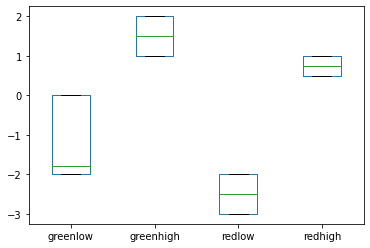

In [153]:
results.sort_values("sum",ascending = False).plot.box(x="sum")

In [246]:
data = klines_table("RAREUSDT", "3m", 15*4*24)
data = maketable (data)
data = data.iloc[20:,:]
buy = True
sell = False

profits = []
results = []
greenlow = [-3,-2,-1,0,0.5]
greenhigh = [1,2,3]
redlow = [-5,-3,-2,-1]
redhigh = [-2,-1,0,0.5,1,2,3]
""""
greenlow = [-1,0,0.1,0.3]
greenhigh = [1,0.5,1.5]
redlow = [-1.5,-2,-1]
redhigh = [0,0.3,-0.1,-0.3]
"""

results = pd.DataFrame({"greenlow":[],"greenhigh":[],"redlow":[],"redhigh":[],"sum":[]})
for j in greenlow:
    for k in greenhigh:
        for l in redlow:
            for m in redhigh:
                buy = True
                sell = False
                profits = []
                for i in range(1,len(data)):
                    if data.iloc[i-1]["signal"] == "green":
                        if buy == True:   
                            if data.iloc[i]["low_togreen"] < j:
                                buyprice = data.iloc[i]["greenline"]*(100+j)/100
                                
                                sell = True
                                buy = False
                        elif sell == True:
                            if data.iloc[i]["high_togreen"] > k:
                                sellprice = data.iloc[i]["greenline"]*(100+k)/100
                                
                                sell = False
                                buy = True
                                profit = ((sellprice-buyprice)-(sellprice+buyprice)*0.0015)/buyprice
                                profits.append(profit)
                                #print ("sell ",sellprice,", buy ",buyprice)
                    if data.iloc[i-1]["signal"] == "red":
                        if buy == True:   
                            if data.iloc[i]["low_togreen"] < l:
                                buyprice = data.iloc[i]["greenline"]*(100+l)/100
                                
                                sell = True
                                buy = False
                        elif sell == True:
                            if data.iloc[i]["high_togreen"] > m:
                                sellprice = data.iloc[i]["greenline"]*(100+m)/100
                                
                                sell = False
                                buy = True
                                profit = ((sellprice-buyprice)-(sellprice+buyprice)*0.0015)/buyprice
                                profits.append(profit)

                sum = 0
                for s in profits:
                    sum += s
                cum = 1
                for i in profits:
                    cum = cum*(1+i)

                result = pd.DataFrame({"greenlow":[j],"greenhigh":[k],"redlow":[l],"redhigh":[m],"sum":[(sum)],"cum":[(cum)]})
                results = pd.concat([results,result],ignore_index=True)

                

In [247]:
results.sort_values("cum",ascending = False).head(20)

,greenlow,greenhigh,redlow,redhigh,sum,cum
221,-1.0,2.0,-1.0,1.0,0.221813,1.243511
307,0.0,2.0,-1.0,3.0,0.213356,1.232337
249,-1.0,3.0,-1.0,1.0,0.212684,1.231052
223,-1.0,2.0,-1.0,3.0,0.209918,1.228929
251,-1.0,3.0,-1.0,3.0,0.200749,1.216616
305,0.0,2.0,-1.0,1.0,0.198650,1.213889
193,-1.0,1.0,-1.0,1.0,0.188269,1.204344
195,-1.0,1.0,-1.0,3.0,0.185839,1.200365
335,0.0,3.0,-1.0,3.0,0.182596,1.194426
286,0.0,2.0,-5.0,3.0,0.172235,1.183664


In [287]:
data = klines_table("SHIBUSDT", "3m", 15*4*24)
data = maketable (data)
data = data.iloc[20:,:]
buy = True
sell = False

profits = []
results = []
greenlow = [-3,-2,-1,0,0.5]
greenhigh = [1,2,3]
redlow = [-5,-3,-2,-1]
redhigh = [-2,-1,0,0.5,1,2,3]
""""
greenlow = [-1,0,0.1,0.3]
greenhigh = [1,0.5,1.5]
redlow = [-1.5,-2,-1]
redhigh = [0,0.3,-0.1,-0.3]
"""

results = pd.DataFrame({"greenlow":[],"redlow":[],"sum":[]})
for j in greenlow:

    for l in redlow:

        buy = True
        sell = False
        profits = []
        for i in range(1,len(data)):
            if data.iloc[i-1]["signal"] == "green":
                if buy == True:   
                    if data.iloc[i]["low_togreen"] < j:
                        buyprice = data.iloc[i]["greenline"]*(100+j)/100
                        sellprice = buyprice*1.03
                        sell = True
                        buy = False
                elif sell == True:
                    if data.iloc[i]["High"] > sellprice:
                        #sellprice = data.iloc[i]["greenline"]*(100+k)/100

                        sell = False
                        buy = True
                        profit = ((sellprice-buyprice)-(sellprice+buyprice)*0.0015)/buyprice
                        profits.append(profit)
                        #print ("sell ",sellprice,", buy ",buyprice)
            if data.iloc[i-1]["signal"] == "red":
                if buy == True:   
                    if data.iloc[i]["low_togreen"] < l:
                        buyprice = data.iloc[i]["greenline"]*(100+l)/100
                        sellprice = buyprice * 1.03
                        sell = True
                        buy = False
                elif sell == True:
                    if data.iloc[i]["High"] > sellprice:
                        #sellprice = data.iloc[i]["greenline"]*(100+m)/100

                        sell = False
                        buy = True
                        profit = ((sellprice-buyprice)-(sellprice+buyprice)*0.0015)/buyprice
                        profits.append(profit)

        sum = 0
        for s in profits:
            sum += s
        cum = 1
        for i in profits:
            cum = cum*(1+i)

        result = pd.DataFrame({"greenlow":[j],"redlow":[l],"sum":[(sum)],"cum":[(cum)]})
        results = pd.concat([results,result],ignore_index=True)

                

In [288]:
results.sort_values("cum",ascending = False).head(20)

,greenlow,redlow,sum,cum
10,-1.0,-2.0,0.026955,1.026955
2,-3.0,-2.0,0.026955,1.026955
18,0.5,-2.0,0.026955,1.026955
6,-2.0,-2.0,0.026955,1.026955
14,0.0,-2.0,0.026955,1.026955
11,-1.0,-1.0,0.000000,1.000000
17,0.5,-3.0,0.000000,1.000000
16,0.5,-5.0,0.000000,1.000000
15,0.0,-1.0,0.000000,1.000000
13,0.0,-3.0,0.000000,1.000000


In [189]:
results.columns

Index(['greenlow', 'greenhigh', 'redlow', 'redhigh', 'sum', 'cum'], dtype='object')

In [193]:
import matplotlib

In [194]:
import matplotlib.pyplot as plt
%matplotlib inline

<Figure size 1152x432 with 0 Axes>

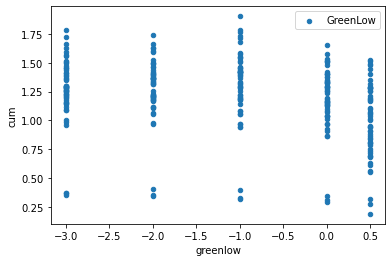

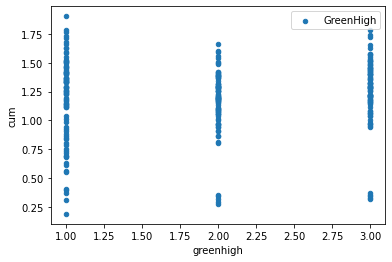

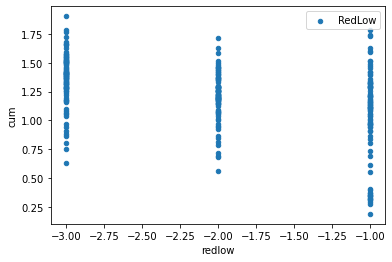

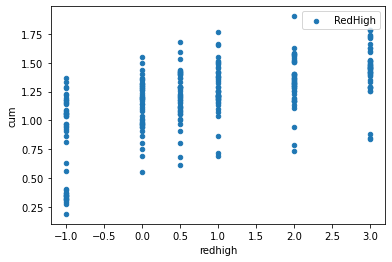

In [211]:
fig = plt.figure(figsize=(16,6))
results.plot.scatter("greenlow","cum", label = "GreenLow")
results.plot.scatter("greenhigh","cum", label = "GreenHigh")
results.plot.scatter("redlow","cum", label = "RedLow")
results.plot.scatter("redhigh","cum", label = "RedHigh")
plt.legend()

In [887]:
sum = 0
for i in profits:
    sum += i
sum / len(data)*4*24

4.041946136406903

In [732]:
data2 = data[['Volume',
       'signal', 
       'slope_greenline', 'needle_length', 'body_length', 'high_togreen',
       'low_togreen', 'high_tored', 'low_tored', 'rsi']]
data2 = data2.iloc[:,1:]

In [685]:
data2.head()

,Volume,signal,slope_greenline,needle_length,body_length,high_togreen,low_togreen,high_tored,low_tored,rsi
Time,,,,,,,,,,
2021-09-20 13:00:00,1.134520e+06,red,-0.084271,2.006905,0.212675,2.886682,0.862468,1.366189,-0.628111,46.187816
2021-09-20 13:15:00,2.577447e+06,red,1.009386,5.710040,4.859932,7.310241,1.513764,6.791543,1.023084,58.129738
2021-09-20 13:30:00,1.915179e+06,green,1.249798,3.251864,0.769231,6.092046,2.750732,7.707661,4.315464,59.686407
2021-09-20 13:45:00,1.500808e+06,green,1.082735,3.540183,1.185453,7.145301,3.481854,8.776955,5.057720,62.067172
2021-09-20 14:00:00,1.491303e+06,green,0.984288,4.312115,-2.164416,5.913320,1.535013,7.526213,3.081232,55.440774


In [16]:
buyprice = 3.2
buyprice = "{:.8f}".format(buyprice)
x = ".8f"
print("\n\nBuy order completed: {}\n\n".format(buyprice))



Buy order completed: 3.20000000




In [9]:
def get_rsi(close, lookback):
    ret = close.diff()
    up = []
    down = []
    for i in range(len(ret)):
        if ret[i] < 0:
            up.append(0)
            down.append(ret[i])
        else:
            up.append(ret[i])
            down.append(0)
    up_series = pd.Series(up)
    down_series = pd.Series(down).abs()
    up_ewm = up_series.ewm(com = lookback - 1, adjust = False).mean()
    down_ewm = down_series.ewm(com = lookback - 1, adjust = False).mean()
    rs = up_ewm/down_ewm
    rsi = 100 - (100 / (1 + rs))
    rsi_df = pd.DataFrame(rsi).rename(columns = {0:'rsi'}).set_index(close.index)
    rsi_df = rsi_df.dropna()
    return rsi_df[3:]


In [10]:
data["rsi"] = get_rsi(data["Close"],14)

NameError: name 'data' is not defined

In [11]:
df = mak

NameError: name 'df' is not defined

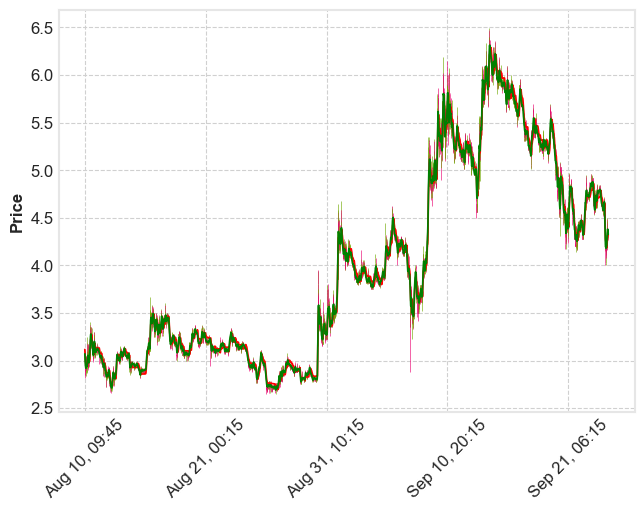

In [605]:
data = df.iloc[15:]
ohlc = df.iloc[15:][["Open","High","Low","Close"]]
ax = mpf.make_addplot(data["redline"],color = "red")
ax2 = mpf.make_addplot(data["greenline"], color = "green")
mpf.plot(ohlc, type="candle", style="binance", addplot = [ax,ax2])


In [686]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.linear_model import LinearRegression

In [733]:
data2

,Volume,signal,slope_greenline,needle_length,body_length,high_togreen,low_togreen,high_tored,low_tored,rsi
Time,,,,,,,,,,
2021-08-10 09:45:00,5.427743e+05,red,-0.955568,3.131246,-2.910737,0.826379,-2.234887,-0.663666,-3.679692,39.880715
2021-08-10 10:00:00,6.254471e+05,red,-0.679829,3.547297,-0.998004,0.500041,-2.942864,-0.985181,-4.377206,38.506925
2021-08-10 10:15:00,1.097376e+06,red,-0.811542,3.363384,-1.849361,-1.454545,-4.661157,-2.910882,-6.070105,35.610750
2021-08-10 10:30:00,8.715353e+05,red,-1.074380,3.226938,-1.747772,-1.654135,-4.728488,-3.107523,-6.136441,33.160449
2021-08-10 10:45:00,5.241911e+05,red,-1.031746,1.678909,-0.174398,-1.844427,-3.465158,-3.295002,-4.891782,32.925850
...,...,...,...,...,...,...,...,...,...,...
2021-09-24 15:45:00,2.820859e+05,green,-0.022826,1.097362,0.557750,-1.138731,-2.211821,0.343860,-0.745323,48.846288
2021-09-24 16:00:00,4.045031e+05,green,-0.265419,1.301720,-0.323550,-0.234648,-1.516626,0.992735,-0.305015,47.882322
2021-09-24 16:15:00,4.699718e+05,green,-0.437818,1.255814,0.487239,0.112092,-1.129538,0.900039,-0.351363,49.268557


In [734]:
data2["high_togreen"] = data2["high_togreen"].shift(1,axis=0)

In [735]:
data2["low_togreen"] = data2["low_togreen"].shift(1,axis=0)

In [736]:
data2.head()

,Volume,signal,slope_greenline,needle_length,body_length,high_togreen,low_togreen,high_tored,low_tored,rsi
Time,,,,,,,,,,
2021-08-10 09:45:00,5.427743e+05,red,-0.955568,3.131246,-2.910737,NaN,NaN,-0.663666,-3.679692,39.880715
2021-08-10 10:00:00,6.254471e+05,red,-0.679829,3.547297,-0.998004,0.826379,-2.234887,-0.985181,-4.377206,38.506925
2021-08-10 10:15:00,1.097376e+06,red,-0.811542,3.363384,-1.849361,0.500041,-2.942864,-2.910882,-6.070105,35.610750
2021-08-10 10:30:00,8.715353e+05,red,-1.074380,3.226938,-1.747772,-1.454545,-4.661157,-3.107523,-6.136441,33.160449
2021-08-10 10:45:00,5.241911e+05,red,-1.031746,1.678909,-0.174398,-1.654135,-4.728488,-3.295002,-4.891782,32.925850


In [737]:
data2["signal_dummy"]=pd.get_dummies(data2["signal"])["green"]

In [738]:
data2.columns

Index(['Volume', 'signal', 'slope_greenline', 'needle_length', 'body_length',
       'high_togreen', 'low_togreen', 'high_tored', 'low_tored', 'rsi',
       'signal_dummy'],
      dtype='object')

In [844]:
X = data2.iloc[1:-1][['slope_greenline']]
Y = data2.iloc[1:-1]["high_togreen"]

In [845]:
X_train = X.iloc[:round(len(X)*0.7),:]
X_test = X.iloc[round(len(X)*0.7):-1,:]
Y_train = Y.iloc[:round(len(Y)*0.7)]
Y_test = Y.iloc[round(len(Y)*0.7):-1]

In [846]:
lm = LinearRegression()
model = lm.fit(X_train, Y_train)

In [847]:
from sklearn.tree import DecisionTreeRegressor
 
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0)
 
# fit the regressor with X and Y data
regressor.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=0)

In [848]:
dftest = klines_table("MINAUSDT","15m",15*30)
dftest= maketable(dftest)

In [776]:
dftest

,Open,High,Low,Close,Volume,Close_time,volume,Number_of_trades,Taker_buy_base_asset_vol,Taker_buy_quote_asset_vol,...,greenline,redline,slope_greenline,needle_length,body_length,high_togreen,low_togreen,high_tored,low_tored,rsi
Time,,,,,,,,,,,,,,,,,,,,,
2021-09-25 06:30:00,4.259,4.287,4.259,4.286,36504.5,1.632552e+12,156005.9736,333.0,22184.8,94761.9567,...,NaN,NaN,NaN,0.657431,0.633952,NaN,NaN,NaN,NaN,NaN
2021-09-25 06:45:00,4.286,4.290,4.276,4.277,42014.3,1.632553e+12,180023.3850,292.0,26506.3,113632.9181,...,NaN,NaN,NaN,0.327409,-0.209986,NaN,NaN,NaN,NaN,NaN
2021-09-25 07:00:00,4.277,4.287,4.264,4.269,13282.4,1.632554e+12,56762.5961,279.0,4635.6,19818.6300,...,NaN,NaN,NaN,0.539400,-0.187047,NaN,NaN,NaN,NaN,NaN
2021-09-25 07:15:00,4.269,4.275,4.230,4.230,36124.6,1.632555e+12,153768.8148,419.0,7676.0,32742.9555,...,NaN,NaN,NaN,1.063830,-0.913563,NaN,NaN,NaN,NaN,NaN
2021-09-25 07:30:00,4.233,4.235,4.200,4.211,84767.7,1.632556e+12,356774.1724,706.0,28022.4,117972.0828,...,NaN,NaN,NaN,0.833333,-0.519726,NaN,NaN,NaN,NaN,NaN
2021-09-25 07:45:00,4.213,4.224,4.200,4.204,42738.2,1.632557e+12,179956.7990,546.0,22214.8,93566.1353,...,NaN,NaN,NaN,0.571429,-0.213624,NaN,NaN,NaN,NaN,NaN
2021-09-25 08:00:00,4.207,4.220,4.179,4.194,58658.7,1.632558e+12,246095.9204,688.0,18892.5,79311.5969,...,NaN,NaN,NaN,0.981096,-0.309009,NaN,NaN,NaN,NaN,NaN
2021-09-25 08:15:00,4.194,4.203,4.130,4.160,90697.1,1.632559e+12,377262.8311,1163.0,32336.4,134414.2545,...,4.228875,4.292308,NaN,1.767554,-0.810682,-0.611865,-2.338092,-2.080655,-3.781372,NaN
2021-09-25 08:30:00,4.160,4.160,4.100,4.112,141185.7,1.632559e+12,580643.0367,1264.0,46325.0,190506.5728,...,4.207125,4.270232,-0.514321,1.463415,-1.153846,-1.120124,-2.546276,-2.581403,-3.986478,NaN


In [851]:
Xt = dftest.iloc[-2:,:][[  'slope_greenline']]

In [852]:
model.predict(Xt)

array([0.79982686, 0.2289241 ])

In [853]:
regressor.predict(Xt)

array([4.74078017, 0.8910711 ])

In [855]:
r2_score(dftest.iloc[-2:,:]["high_togreen"],model.predict(Xt))

-0.12761998342895664

In [857]:
r2_score(dftest.iloc[-2:,:]["high_togreen"],regressor.predict(Xt))

-66.16712744494261

In [854]:
dftest

,Open,High,Low,Close,Volume,Close_time,volume,Number_of_trades,Taker_buy_base_asset_vol,Taker_buy_quote_asset_vol,...,redline,slope_greenline,needle_length,body_length,high_togreen,low_togreen,high_tored,low_tored,rsi,signal_dummy
Time,,,,,,,,,,,,,,,,,,,,,
2021-09-25 07:00:00,4.277,4.287,4.264,4.269,13282.4,1.632554e+12,56762.5961,279.0,4635.6,19818.6300,...,NaN,NaN,0.539400,-0.187047,NaN,NaN,NaN,NaN,NaN,0
2021-09-25 07:15:00,4.269,4.275,4.230,4.230,36124.6,1.632555e+12,153768.8148,419.0,7676.0,32742.9555,...,NaN,NaN,1.063830,-0.913563,NaN,NaN,NaN,NaN,NaN,0
2021-09-25 07:30:00,4.233,4.235,4.200,4.211,84767.7,1.632556e+12,356774.1724,706.0,28022.4,117972.0828,...,NaN,NaN,0.833333,-0.519726,NaN,NaN,NaN,NaN,NaN,0
2021-09-25 07:45:00,4.213,4.224,4.200,4.204,42738.2,1.632557e+12,179956.7990,546.0,22214.8,93566.1353,...,NaN,NaN,0.571429,-0.213624,NaN,NaN,NaN,NaN,NaN,0
2021-09-25 08:00:00,4.207,4.220,4.179,4.194,58658.7,1.632558e+12,246095.9204,688.0,18892.5,79311.5969,...,NaN,NaN,0.981096,-0.309009,NaN,NaN,NaN,NaN,NaN,0
2021-09-25 08:15:00,4.194,4.203,4.130,4.160,90697.1,1.632559e+12,377262.8311,1163.0,32336.4,134414.2545,...,NaN,NaN,1.767554,-0.810682,NaN,NaN,NaN,NaN,NaN,0
2021-09-25 08:30:00,4.160,4.160,4.100,4.112,141185.7,1.632559e+12,580643.0367,1264.0,46325.0,190506.5728,...,NaN,NaN,1.463415,-1.153846,NaN,NaN,NaN,NaN,NaN,0
2021-09-25 08:45:00,4.111,4.240,4.103,4.214,143799.5,1.632560e+12,598842.0892,1652.0,69062.4,287796.0015,...,4.262239,NaN,3.339020,2.505473,0.970411,-2.292076,-0.521762,-3.736035,NaN,0
2021-09-25 09:00:00,4.216,4.250,4.175,4.218,106076.1,1.632561e+12,447223.6732,1154.0,49814.0,210156.0624,...,4.255768,-0.151813,1.796407,0.047438,1.362430,-0.426318,-0.135537,-1.897851,NaN,0


In [900]:
X2 = df.iloc[30:-1,:]["slope_greenline"]
X2 = np.array(X2).reshape(-1,1)

In [907]:
Y2 = df.iloc[30:-1,:]["high_tored"]
Y2 = np.array(Y2).reshape(-1,1)

In [908]:
lm = LinearRegression()
model2 = lm.fit(X2,Y2)

In [909]:
r2_score(model2.predict(X2),Y2)

0.4819621836470094

In [910]:
Y2

array([[1.01116632],
       [0.84242064],
       [1.55115251],
       ...,
       [0.99273506],
       [0.90003866],
       [0.59877534]])

In [911]:
model2.predict(X2)

array([[-0.37176153],
       [ 1.12642   ],
       [ 1.36491451],
       ...,
       [-0.70759308],
       [-1.58816169],
       [-0.89334171]])